# 项目：用线性回归预测房价数据

## 分析目标

此数据分析报告的目的是，基于已有的房屋销售价格，以及有关该房屋的属性，进行线性回归分析，从而利用得到的线性回归模型，能对以下未知售价的房屋根据属性进行价格预测：

面积为6500平方英尺，有4个卧室、2个厕所，总共2层，不位于主路，无客人房，带地下室，有热水器，没有空调，车位数为2，位于城市首选社区，简装修。

## 简介

数据集`house_price.csv`记录了超过五百栋房屋的交易价格，以及房屋的相关属性信息，包括房屋面积、卧室数、厕所数、楼层数、是否位于主路、是否有客房，等等。

`house_price.csv`每列的含义如下：
- price：房屋出售价格
- area：房屋面积，以平方英尺为单位
- bedrooms：卧室数
- bathrooms：厕所数
- stories：楼层数
- mainroad：是否位于主路
   - yes  是
   - no	  否
- guestroom：是否有客房
   - yes  是
   - no	  否
- basement：是否有地下室
   - yes  是
   - no	  否
- hotwaterheating：是否有热水器
   - yes  是
   - no	  否
- airconditioning：是否有空调
   - yes  是
   - no	  否
- parking：车库容量，以车辆数量为单位
- prefarea：是否位于城市首选社区
   - yes  是
   - no	  否
- furnishingstatus：装修状态
   - furnished       精装
   - semi-furnished	 简装
   - unfurnished     毛坯

## 库函数导入

In [351]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 读入数据

In [352]:
yuanshi_house_price = pd.read_csv("house_price.csv")
yuanshi_house_price

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


## 数据评估与清理

In [353]:
yuanshi_house_price.sample(15)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
14,9240000,7800,3,2,2,yes,no,no,no,no,0,yes,semi-furnished
20,8750000,4320,3,1,2,yes,no,yes,yes,no,2,no,semi-furnished
504,2653000,3185,2,1,1,yes,no,no,no,yes,0,no,unfurnished
437,3290000,5880,3,1,1,yes,no,no,no,no,1,no,unfurnished
189,5040000,3540,2,1,1,no,yes,yes,no,no,0,no,semi-furnished
513,2485000,4400,3,1,2,yes,no,no,no,no,0,no,unfurnished
228,4690000,3630,3,1,2,yes,no,no,no,no,2,no,semi-furnished
499,2660000,3630,3,3,2,no,yes,no,no,no,0,no,unfurnished
35,8080940,7000,3,2,4,yes,no,no,no,yes,2,no,furnished
124,5950000,6525,3,2,4,yes,no,no,no,no,1,no,furnished


数据整体结构整齐，不需要改变

In [354]:
yuanshi_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


1.数据整体比较完善和齐全，没有缺失值。
2.数据类型可以把price和area改为浮点型方便之后运算
3.对于 mainroad：是否位于主路，guestroom：是否有客房，basement：是否有地下室，hotwaterheating：是否有热水器，airconditioning：是否有空调等数据都是分类数据，可以转换成Category型。

### 处理无效或者错误数据

In [355]:
yuanshi_house_price

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [356]:
yuanshi_house_price.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


没有超出实际意义的数值，可不做改变

### 处理不一致数据

In [357]:
yuanshi_house_price["mainroad"].value_counts()

mainroad
yes    468
no      77
Name: count, dtype: int64

In [358]:
yuanshi_house_price["guestroom"].value_counts()

guestroom
no     448
yes     97
Name: count, dtype: int64

In [359]:
yuanshi_house_price["basement"].value_counts()

basement
no     354
yes    191
Name: count, dtype: int64

In [360]:
yuanshi_house_price["hotwaterheating"].value_counts()

hotwaterheating
no     520
yes     25
Name: count, dtype: int64

In [361]:
yuanshi_house_price["airconditioning"].value_counts()

airconditioning
no     373
yes    172
Name: count, dtype: int64

In [362]:
yuanshi_house_price["prefarea"].value_counts()

prefarea
no     417
yes    128
Name: count, dtype: int64

In [363]:
yuanshi_house_price["furnishingstatus"].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

经过分析不存在不一致数据

## 数据清洗

In [364]:
cleaned_house_price = yuanshi_house_price.copy()

In [365]:
cleaned_house_price['price'] = cleaned_house_price['price'].astype(float)
cleaned_house_price['area'] = cleaned_house_price['area'].astype(float)

In [366]:
cleaned_house_price['mainroad'] = cleaned_house_price['mainroad'].astype("category")
cleaned_house_price['guestroom'] = cleaned_house_price['guestroom'].astype("category")
cleaned_house_price['basement'] = cleaned_house_price['basement'].astype("category")
cleaned_house_price['hotwaterheating'] = cleaned_house_price['hotwaterheating'].astype("category")
cleaned_house_price['airconditioning'] = cleaned_house_price['airconditioning'].astype("category")
cleaned_house_price['prefarea'] = cleaned_house_price['prefarea'].astype("category")
cleaned_house_price['furnishingstatus'] = cleaned_house_price['furnishingstatus'].astype("category")

## 数据可视化

In [367]:
## 设置调试盘
sns.set_palette("pastel")

### 房价分布

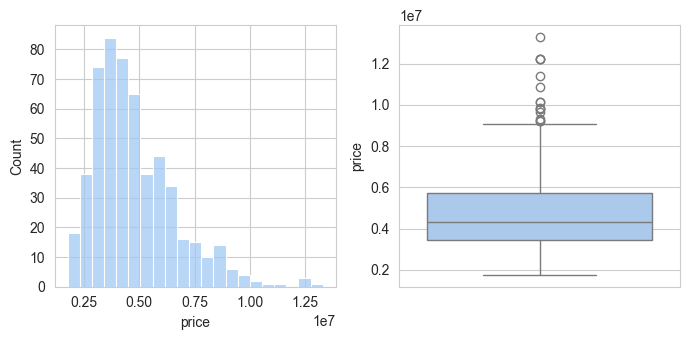

In [368]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
figure, axes = plt.subplots(1, 2)
sns.histplot(cleaned_house_price, x='price', ax=axes[0])
sns.boxplot(cleaned_house_price, y='price', ax=axes[1])
plt.savefig('房价分布图.png')
plt.show()

   房价呈右偏态分布，说明数据集中的大多数房子价格中等，但有一些价格很高的极端值，使得均值被拉高

### 面积分布

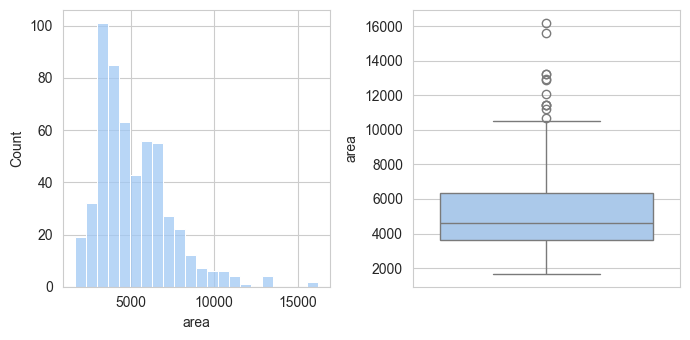

In [369]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
figure, axes = plt.subplots(1, 2)
sns.histplot(cleaned_house_price, x='area', ax=axes[0])
sns.boxplot(cleaned_house_price, y='area', ax=axes[1])
plt.savefig('房价分布图.png')
plt.show()

房间面积和房价分布相似，呈右偏态分布，说明数据集中的大多数房子面积也偏中等。

## 房价和其他属性关系进一步分析

### 房价与卧室数

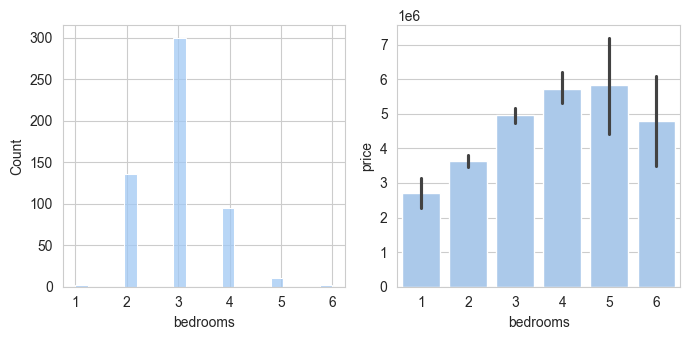

In [370]:
figure, axes = plt.subplots(1, 2)
sns.histplot(cleaned_house_price, x='bedrooms', ax=axes[0])
sns.barplot(cleaned_house_price, x='bedrooms', y='price', ax=axes[1])
plt.show()

其中三个卧室的房子最多，其次是两个和四个的，一个，五个和六个的房间很少。
在价格表现上也不是卧室越多房价越高，四个卧室和五个卧室的价格反而比六个卧室的房价更高

### 房价与地理位置

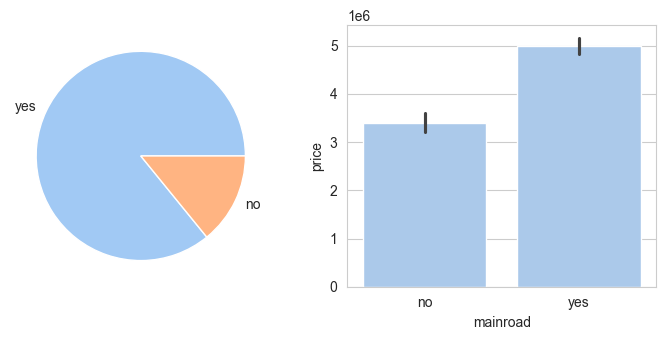

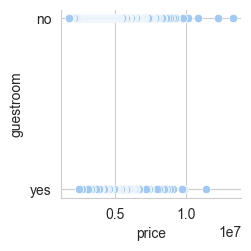

In [371]:
figure, axes = plt.subplots(1, 2)
mainroad_count = cleaned_house_price['mainroad'].value_counts()
mainroad_label = mainroad_count.index
axes[0].pie(mainroad_count, labels=mainroad_label)
sns.barplot(cleaned_house_price, x='mainroad', y='price', ax=axes[1])
sns.pairplot(cleaned_house_price,x_vars=["price"],y_vars=["guestroom"])
plt.show()

可以看到，大部分房子是位于主路的，且位于主路的房子价格普遍高于没在主路的,且可以看到没在主路的房子最高价格不会超过一个度。

### 房价与客厅

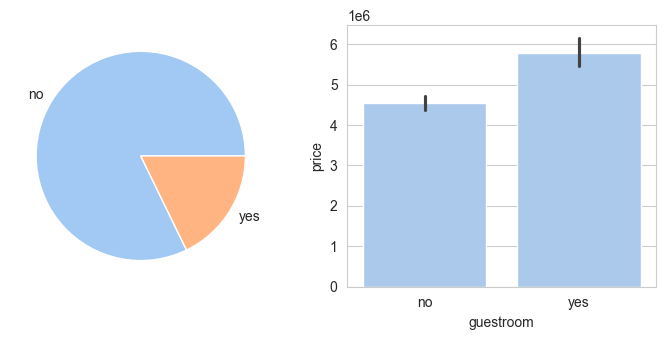

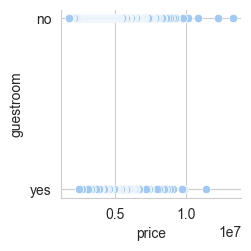

In [372]:
figure, axes = plt.subplots(1, 2)
guestroom_count = cleaned_house_price['guestroom'].value_counts()
guestroom_label = guestroom_count.index
axes[0].pie(guestroom_count, labels=guestroom_label)
sns.barplot(cleaned_house_price, x='guestroom', y='price', ax=axes[1])
sns.pairplot(cleaned_house_price,x_vars=["price"],y_vars=["guestroom"])
plt.show()

### 房价与是否有地下室

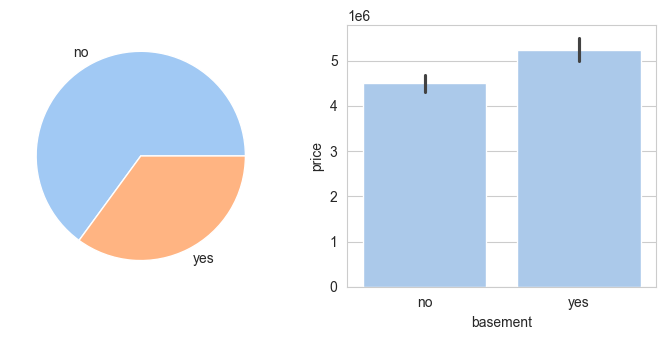

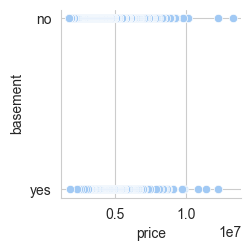

In [373]:
figure, axes = plt.subplots(1, 2)
basement_count = cleaned_house_price['basement'].value_counts()
basement_label = basement_count.index
axes[0].pie(basement_count, labels=basement_label)
sns.barplot(cleaned_house_price, x='basement', y='price', ax=axes[1])
sns.pairplot(cleaned_house_price,x_vars=["price"],y_vars=["basement"])
plt.show()

### 房价与面积

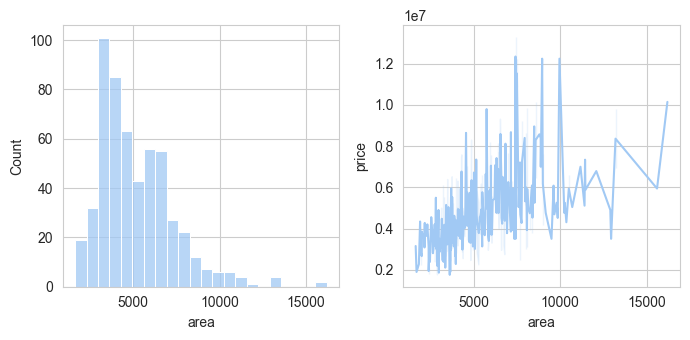

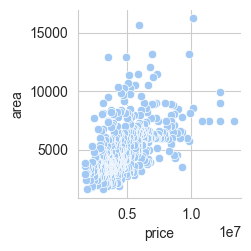

In [374]:
figure, axes = plt.subplots(1, 2)
sns.histplot(cleaned_house_price, x='area', ax=axes[0])
sns.lineplot(cleaned_house_price, x='area', y='price', ax=axes[1])
sns.pairplot(cleaned_house_price,x_vars=["price"],y_vars=["area"])
plt.show()

### 房价与热水器

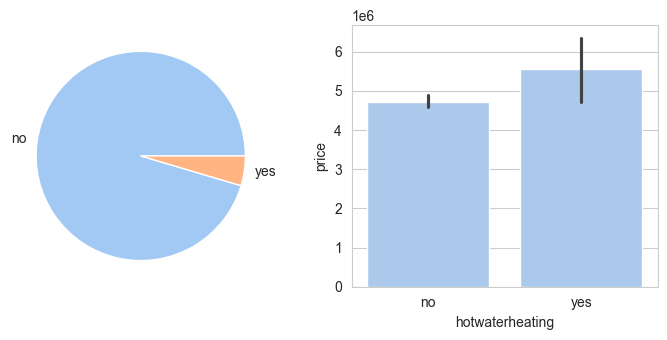

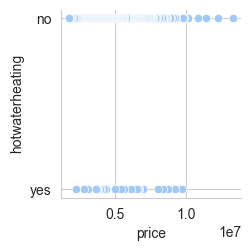

In [375]:
figure, axes = plt.subplots(1, 2)
hotwaterheating_count = cleaned_house_price['hotwaterheating'].value_counts()
hotwaterheating_label = hotwaterheating_count.index
axes[0].pie(hotwaterheating_count, labels=hotwaterheating_label)
sns.barplot(cleaned_house_price, x='hotwaterheating', y='price', ax=axes[1])
sns.pairplot(cleaned_house_price,x_vars=["price"],y_vars=["hotwaterheating"])
plt.show()

### 房价装修程度

C:\Users\CAshely\AppData\Local\Temp\ipykernel_20280\3497659132.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, horizontalalignment='right')


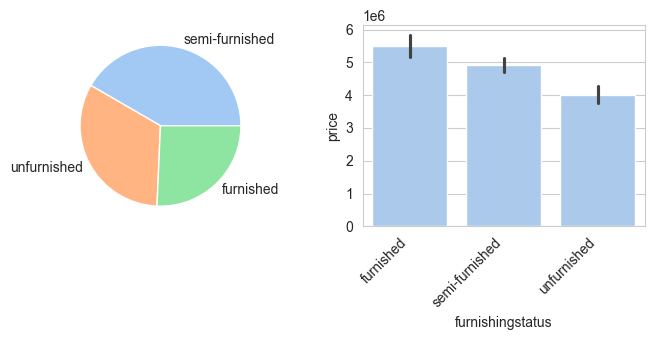

In [376]:
figure, axes = plt.subplots(1, 2)
furnishingstatus_count = cleaned_house_price['furnishingstatus'].value_counts()
furnishingstatus_label = furnishingstatus_count.index
axes[0].pie(furnishingstatus_count, labels=furnishingstatus_label)
sns.barplot(cleaned_house_price, x='furnishingstatus', y='price', ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

## 数据分析

In [377]:
import statsmodels.api as sm

In [378]:
cleaned_house_price

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000.0,7420.0,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000.0,8960.0,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000.0,9960.0,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000.0,7500.0,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000.0,7420.0,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000.0,3000.0,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150.0,2400.0,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000.0,3620.0,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000.0,2910.0,3,1,1,no,no,no,no,no,0,no,furnished


In [379]:
lr_huose_price=cleaned_house_price.copy()

In [380]:
#lr_huose_price['price'] = lr_huose_price['price'].astype(int)
#lr_huose_price['area'] = lr_huose_price['area'].astype(int)

In [381]:
lr_huose_price=pd.get_dummies(lr_huose_price,drop_first=True,columns=['mainroad','guestroom',
                                                       'basement','hotwaterheating',
                                                       'airconditioning','prefarea',
                                                       'furnishingstatus'],dtype=int)
lr_huose_price

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000.0,7420.0,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000.0,8960.0,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000.0,9960.0,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000.0,7500.0,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000.0,7420.0,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000.0,3000.0,2,1,1,2,1,0,1,0,0,0,0,1
541,1767150.0,2400.0,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000.0,3620.0,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000.0,2910.0,3,1,1,0,0,0,0,0,0,0,0,0


In [382]:
y= lr_huose_price['price']

In [383]:
X= lr_huose_price.drop(['price'],axis=1)

对各个变相之间的相关系数进行分析

In [384]:
X.corr().abs() > 0.8

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
area,True,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False
stories,False,False,False,True,False,False,False,False,False,False,False,False,False
parking,False,False,False,False,True,False,False,False,False,False,False,False,False
mainroad_yes,False,False,False,False,False,True,False,False,False,False,False,False,False
guestroom_yes,False,False,False,False,False,False,True,False,False,False,False,False,False
basement_yes,False,False,False,False,False,False,False,True,False,False,False,False,False
hotwaterheating_yes,False,False,False,False,False,False,False,False,True,False,False,False,False
airconditioning_yes,False,False,False,False,False,False,False,False,False,True,False,False,False


当相关系数大于0.8时会有严重的共线性，所以先检查其相关系数是否有大于0.8的，经过检查变量之间相关系数没有大于0.8的。

接下来给线性方程添加截距

In [385]:
X=sm.add_constant(X)

In [386]:
model=sm.OLS(y,X).fit()

In [387]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     87.52
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          9.07e-123
Time:                        12:02:27   Log-Likelihood:                -8331.5
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     531   BIC:                         1.675e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

表格分析：1.首先观察p值，当p值大于我们设定的显著区间时就说明这个变量对于我们预测房价没有显著作用的变量。
所以可以把这些变量移除出我们的预测变量。

In [388]:
X=X.drop(['const','bedrooms','furnishingstatus_semi-furnished'], axis=1)
X

,area,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_unfurnished
0,7420.0,2,3,2,1,0,0,0,1,1,0
1,8960.0,4,4,3,1,0,0,0,1,0,0
2,9960.0,2,2,2,1,0,1,0,0,1,0
3,7500.0,2,2,3,1,0,1,0,1,1,0
4,7420.0,1,2,2,1,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
540,3000.0,1,1,2,1,0,1,0,0,0,1
541,2400.0,1,1,0,0,0,0,0,0,0,0
542,3620.0,1,1,0,1,0,0,0,0,0,1
543,2910.0,1,1,0,0,0,0,0,0,0,0


In [389]:
model=sm.OLS(y,X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              1088.
Date:                Wed, 13 Mar 2024   Prob (F-statistic):                        0.00
Time:                        12:02:27   Log-Likelihood:                         -8333.5
No. Observations:                 545   AIC:                                  1.669e+04
Df Residuals:                     534   BIC:                                  1.674e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

可以看到R方从0.68变到了0.96，说明我们提高了现有数据的拟合度

## 价格预测
下面对一个这样的房屋进行价格预测：面积为6500平方英尺，有4个卧室、2个厕所，总共2层，不位于主路，无客人房，带地下室，有热水器，没有空调，车位数为2，位于城市首选社区，简装修。

In [390]:
price_to_predict = pd.DataFrame({'area': [5600], 'bedrooms': [4], 'bathrooms': [2], 
                                 'stories': [2], 'mainroad': ['no'], 'guestroom': ['no'],
                                 'basement': ['yes'], 'hotwaterheating': ['yes'],
                                 'airconditioning': ['no'], 'parking': 2, 'prefarea': ['yes'],
                                 'furnishingstatus': ['semi-furnished']})
price_to_predict

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,5600,4,2,2,no,no,yes,yes,no,2,yes,semi-furnished


我们需要把分类变量的类型转换为Category，并且通过categories参数，让程序知道所有可能的分类值。这样做的原因是，预测数据包含的分类可能不全。我们需要确保引入虚拟变量的时候，不会漏掉某个或某些分类。

In [391]:
price_to_predict['mainroad'] = pd.Categorical(price_to_predict['mainroad'], categories=['no', 'yes'])
price_to_predict['guestroom'] = pd.Categorical(price_to_predict['guestroom'], categories=['no', 'yes'])
price_to_predict['basement'] = pd.Categorical(price_to_predict['basement'], categories=['no', 'yes'])
price_to_predict['hotwaterheating'] = pd.Categorical(price_to_predict['hotwaterheating'], categories=['no', 'yes'])
price_to_predict['airconditioning'] = pd.Categorical(price_to_predict['airconditioning'], categories=['no', 'yes'])
price_to_predict['prefarea'] = pd.Categorical(price_to_predict['prefarea'], categories=['no', 'yes'])
price_to_predict['furnishingstatus'] = pd.Categorical(price_to_predict['furnishingstatus'], categories=['furnished', 'semi-furnished', 'unfurnished'])

对分类变量引入虚拟变量。

In [392]:
price_to_predict = pd.get_dummies(price_to_predict, drop_first=True, 
                                  columns=['mainroad', 'guestroom',
                                           'basement', 'hotwaterheating',
                                           'airconditioning','prefarea', 
                                           'furnishingstatus'], dtype=int)
price_to_predict.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,5600,4,2,2,2,0,0,1,1,0,1,1,0


In [393]:
price_to_predict=price_to_predict.drop(['bedrooms','furnishingstatus_semi-furnished'], axis=1)

In [394]:
predicted_value=model.predict(price_to_predict)
predicted_value

0    7.071927e+06
dtype: float64